In [4]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent


In [5]:
X,Y=load_planar_dataset()

## visualize the data

ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 400, 'y' with size 400.

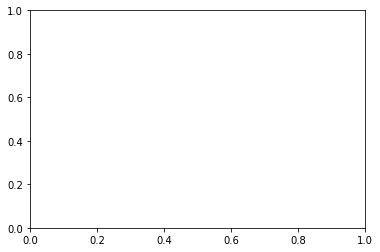

In [6]:


# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);



You have:
    - a numpy-array (matrix) X that contains your features (x1, x2)
    - a numpy-array (vector) Y that contains your labels (red:0, blue:1).

Lets first get a better sense of what our data is like. 

**Exercise**: How many training examples do you have? In addition, what is the `shape` of the variables `X` and `Y`? 

**Hint**: How do you get the shape of a numpy array? [(help)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)

In [16]:
shape_X=X.shape
shape_Y=Y.shape
m=X.shape[1]# training set size


print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [17]:
X

array([[ 1.20444229e+00,  1.58709904e-01,  9.52471960e-02,
         3.49178475e-01,  6.94150378e-01,  1.62065038e+00,
         1.53856225e+00,  3.63085641e-02,  4.74591109e-01,
         1.65695828e-01,  1.66446249e+00,  8.40285720e-01,
         2.61695163e-01,  2.31614896e-01,  1.58013020e+00,
         6.35509950e-03,  6.80610419e-01,  1.21400432e-01,
         1.13281261e+00,  1.61505892e+00,  1.66454441e-01,
         1.72438241e+00,  1.88667246e+00,  1.72327227e+00,
         1.54661332e+00,  9.84590400e-01,  1.45313345e+00,
         7.49043388e-01,  1.45048341e+00,  1.64287865e+00,
         1.28141487e+00,  1.59574104e+00,  1.46298294e+00,
         1.46629048e+00,  1.54348961e+00,  1.57013416e+00,
         1.22995404e+00,  1.31142345e+00, -1.99364553e+00,
         3.94564752e-01,  1.51715449e+00,  1.69169139e+00,
         1.74186686e+00, -2.91373382e+00,  7.52150898e-01,
         1.68537303e+00,  3.71160238e-01, -3.73033884e+00,
         3.52484080e-01, -1.48694206e+00, -7.45290416e-0

##### train the logistic regression classifier

In [18]:
clf=sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T,Y.T)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [19]:
# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


 Exercise: Define three variables:

- n_x: the size of the input layer
- n_h: the size of the hidden layer (set this to 4) 
- n_y: the size of the output layer

Hint: Use shapes of X and Y to find n_x and n_y. Also, hard code the hidden layer size to be 4.

In [20]:
X.shape[0] 
Y.shape

(1, 400)

### layer size

In [21]:
def layer_size(X,Y):
    
    
    n_x=X.shape[0]  #size of input layer
    n_h=4 #size of hidden layer
    n_y=Y.shape[0] #size of output layer 
    
    
    return n_x,n_h,n_y

In [18]:


X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_size(X_assess, Y_assess)
print(X_assess.shape)
print(Y_assess.shape)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))



(5, 3)
(2, 3)
The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


## 4.2 - Initialize the model's parameters
 
Exercise: Implement the function initialize_parameters().
Instructions:

    Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
    You will initialize the weights matrices with random values.
        Use: np.random.randn(a,b) * 0.01 to randomly initialize a matrix of shape (a,b).
    You will initialize the bias vectors as zeros.
        Use: np.zeros((a,b)) to initialize a matrix of shape (a,b) with zeros.


In [28]:
def initialize_parameters(n_x,n_h,n_y):
    
    
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
   
    return parameters

In [31]:


n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


W1 = [[-0.0063873   0.00423494]
 [ 0.0007734  -0.00343854]
 [ 0.00043597 -0.00620001]
 [ 0.00698032 -0.00447129]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.01224508  0.00403492  0.00593579 -0.01094912]]
b2 = [[0.]]


 ## 4.3 - The Loop
Question: Implement forward_propagation().
Instructions:

    Look above at the mathematical representation of your classifier.
    You can use the function sigmoid(). It is built-in (imported) in the notebook.
    You can use the function np.tanh(). It is part of the numpy library.
    The steps you have to implement are:
        Retrieve each parameter from the dictionary "parameters" (which is the output of initialize_parameters()) by using parameters[".."].
        Implement Forward Propagation. Compute Z[1],A[1],Z[2]Z[1],A[1],Z[2] and A[2]A[2] (the vector of all your predictions on all the examples in the training set).
    Values needed in the backpropagation are stored in "cache". The cache will be given as an input to the backpropagation function.


In [46]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]  # (4,2)
    b1 = parameters["b1"]  # (4,1)
    W2 = parameters["W2"]  # (1,4)
    b2 = parameters["b2"]  # (1,1)
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###
    

    
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [47]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

In [48]:
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


 ### Instructions:

    There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented −∑i=0my(i)log(a[2](i)):

    logprobs = np.multiply(np.log(A2),Y)
    cost = - np.sum(logprobs)                # no need to use a for loop!

(you can use either np.multiply() and then np.sum() or directly np.dot()).

### compute cost function 

In [53]:
def compute_cost(A2,Y,parameters):
    m=Y.shape[1] # nuber of example
    cost = np.float64((-1.0/m) * (np.dot(Y, np.log(A2).T) + np.dot(1-Y, np.log(1-A2).T)))
    cost=np.squeeze(cost)
    return cost


In [54]:


A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))



cost = 0.6930587610394646


## Question: Implement the function backward_propagation().
Instructions: Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.
Tips:

    To compute dZ1 you'll need to compute g[1]′(Z[1]). Since g[1](.) is the tanh activation function, if a=g[1](z) then g[1]′(z)=1−a2. So you can compute g[1]′(Z[1]) using (1 - np.power(A1, 2)).


In [60]:
def back_propagation(parameters,cache,X,Y):
    m=X.shape[1]
    
    W1=parameters['W1']
    W2=parameters['W2']
    
    A1=cache['A1']
    A2=cache['A2']
    
    
    #back prop
    dz2=A2-Y
    dW2=(1/m)*np.dot(dz2,A1.T)
    db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)
    dz1=np.dot(W2.T,dz2)*(1-np.power(A1,2))
    dW1=(1/m)*np.dot(dz1,X.T)
    db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)
    
    grads={"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

In [61]:


parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = back_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))



dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [62]:
def update_parameters(parameters,grads,learning_rate=1.2):
    
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]   
    
    
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]   
    
    
    
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2    
    
    
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    
    return parameters

In [63]:


parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))



W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


### Neural Network model

In [80]:
def neural_model(X,Y,n_h,num_iterations=10000,print_cost=False):
    
    np.random.seed(3)
    n_x=layer_size(X,Y)[0]
    n_y=layer_size(X,Y)[2]
    
    parameters=initialize_parameters(n_x,n_h,n_y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    for i in range(0, num_iterations):
         
  
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = back_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters
    

In [81]:


X_assess, Y_assess = nn_model_test_case()
parameters = neural_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))



Cost after iteration 0: 0.693198
Cost after iteration 1000: 0.000219
Cost after iteration 2000: 0.000108
Cost after iteration 3000: 0.000071
Cost after iteration 4000: 0.000053
Cost after iteration 5000: 0.000043
Cost after iteration 6000: 0.000035
Cost after iteration 7000: 0.000030
Cost after iteration 8000: 0.000027
Cost after iteration 9000: 0.000024
W1 = [[ 0.56305445 -1.03925886]
 [ 0.7345426  -1.36286875]
 [-0.72533346  1.33753027]
 [ 0.74757629 -1.38274074]]
b1 = [[-0.22240654]
 [-0.34662093]
 [ 0.33663708]
 [-0.35296113]]
W2 = [[ 1.82196893  3.09657075 -2.98193564  3.19946508]]
b2 = [[0.21344644]]


In [82]:
def predict(parameters, X):
    
 
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    ### END CODE HERE ###
    
    return predictions

In [83]:


parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))



predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.258625
Cost after iteration 2000: 0.239334
Cost after iteration 3000: 0.230802
Cost after iteration 4000: 0.225528
Cost after iteration 5000: 0.221845
Cost after iteration 6000: 0.219094
Cost after iteration 7000: 0.220884
Cost after iteration 8000: 0.219483
Cost after iteration 9000: 0.218548


ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 400, 'y' with size 400.

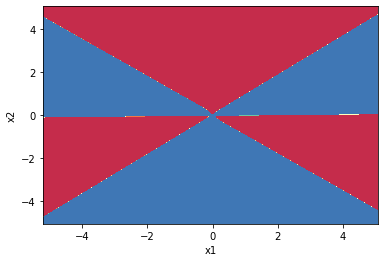

In [85]:


# Build a model with a n_h-dimensional hidden layer
parameters = neural_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))



In [86]:


# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')



Accuracy: 90%


ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 400, 'y' with size 400.

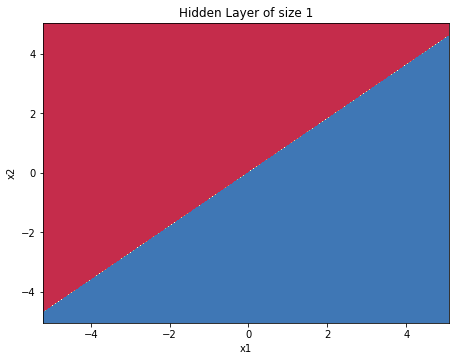

In [88]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = neural_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))




ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 200, 'y' with size 200.

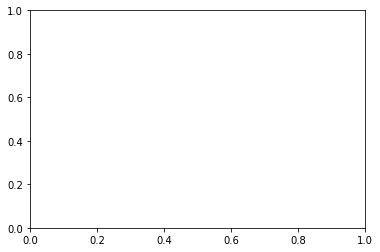

In [89]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "gaussian_quantiles"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);